# Import Libraries


In [9]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load and Preprocessing data

In [10]:
df = pd.read_csv("C:/ML/Labwork3/dataset/KNN/bank-full.csv", sep = ';')

df['y'] = LabelEncoder().fit_transform(df['y'])

x = pd.get_dummies(df.drop(columns = ['y']), drop_first = True)
y = df['y']

x, _, y, _ = train_test_split(x, y, train_size = 5000, stratify = y, random_state = 42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

# Run K-NN and compute error

In [11]:
def knn_error(x_train, x_test, y_train, y_test, k =5):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    return 1 - accuracy_score(y_test, preds)

print("Classificatrion error (k = 5): ", knn_error(x_train, x_test, y_train, y_test))

Classificatrion error (k = 5):  0.12


# Vary k and plot errors

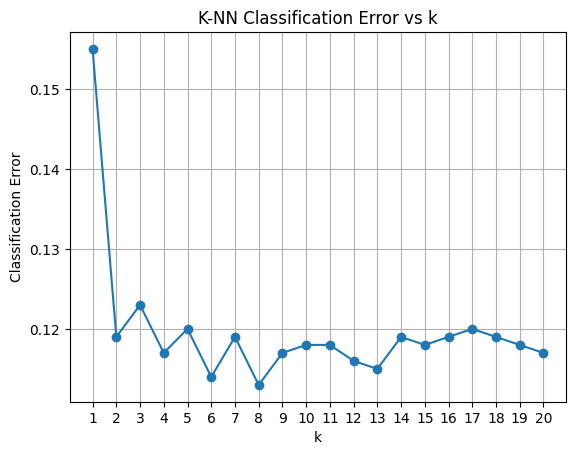

In [12]:
errors = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    errors.append(1 - accuracy_score(y_test, y_pred))

plt.plot(k_values, errors, marker = 'o')
plt.title("K-NN Classification Error vs k")
plt.xlabel("k")
plt.ylabel("Classification Error")
plt.xticks(k_values)
plt.grid(True)
plt.savefig("C:/ML/Labwork3/visualizations/KNN/bank_knn_error_vs_k.png")
plt.show()

# Normalize and rerun

In [13]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print("K-NN error after normalization (k = 5): ", knn_error(x_train_scaled, x_test_scaled, y_train, y_test))

K-NN error after normalization (k = 5):  0.11199999999999999


# PCA and SVD

In [14]:
pca = PCA(n_components = 10)
svd = TruncatedSVD(n_components = 10)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)
x_train_svd = svd.fit_transform(x_train_scaled)
x_test_svd = svd.transform(x_test_scaled)

print("K-NN error after PCA (k = 5): ", knn_error(x_train_pca, x_test_pca, y_train, y_test))
print("K-NN error after SVD (k = 5): ", knn_error(x_train_svd, x_test_svd, y_train, y_test))

K-NN error after PCA (k = 5):  0.128
K-NN error after SVD (k = 5):  0.13


# K-fold Cross validation to tune k

In [15]:
from sklearn.model_selection import cross_val_score

best_k = 1
best_score = 0
for k in k_values:
    model = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(model, scaler.fit_transform(x), y, cv = 5)
    score = scores.mean()
    if score > best_score:
        best_score = score
        best_k = k

print(f"Best k via 5-folds CV {best_k} with accuracy: {best_score:.4f}")

Best k via 5-folds CV 15 with accuracy: 0.8894


# Leave-One-Out cross validation

In [16]:
loo = LeaveOneOut()
model = KNeighborsClassifier(n_neighbors =5)
loo_scores = cross_val_score(model, scaler.fit_transform(x[:500]), y[:500], cv = LeaveOneOut())
print("Leave-One-Out error (k = 5): ", 1 - np.mean(loo_scores))

Leave-One-Out error (k = 5):  0.122
